In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("dark")


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

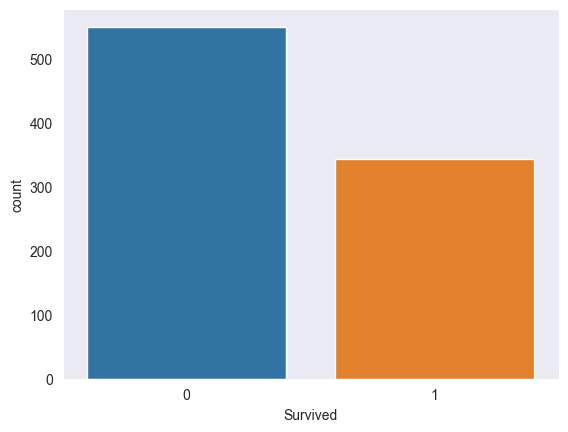

In [9]:
sns.countplot(x ="Survived", data = df_train)

In [10]:
#Survival ratio of this Titanic dataset

#More readable
Survived_count = (df_train["Survived"] == 1).sum()    
Totalcount     =  df_train["Survived"].count()
print(Survived_count/Totalcount)

#print(df_train.Survived.sum()/df_train.Survived.count())   --one liner


0.3838383838383838


# How does Sex Inclence Survival chances 

In [11]:
df_train.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

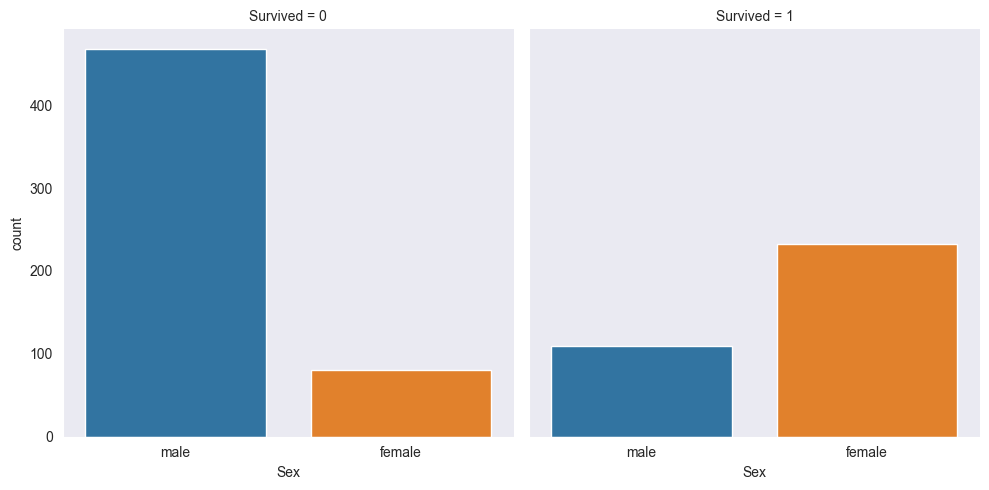

In [12]:
sns.catplot(x = 'Sex', col='Survived', kind= 'count', data = df_train)

In [13]:
Total_females    = (df_train['Sex'] == 'female').sum()
Survived_females = df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)].shape[0]
FemaleSurvivalPercentage = round((Survived_females/Total_females)*100, 2)
print(f"percentage of female survivors is {FemaleSurvivalPercentage}")

Total_males = (df_train['Sex'] == 'male').sum()
Survived_males = df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)].shape[0]
MaleSurvivalPercentage = round((Survived_males/Total_males)*100, 2)
print(f"percentage of male survivors is {MaleSurvivalPercentage}")

percentage of female survivors is 74.2
percentage of male survivors is 18.89


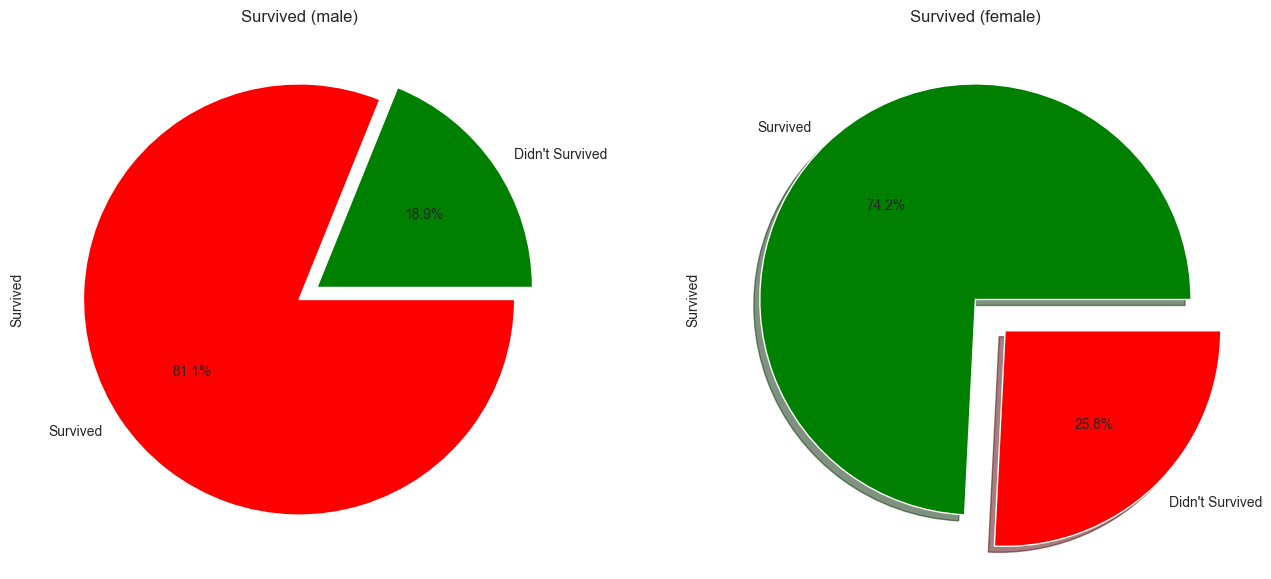

In [14]:
f, ax = plt.subplots(1,2, figsize=(16,7))

lable_map = ['Survived', "Didn't Survived"]

# Creating a pie chart for Survival percentage of MALE
df_train['Survived'][df_train['Sex'] == 'male'].value_counts().plot.pie(
    explode=[0, 0.1],
    labels = lable_map,
    autopct='%1.1f%%',
    ax=ax[0], 
    shadow = False,
    colors=["red", "green"],
    counterclock = False)

ax[0].set_title('Survived (male)')


# Creating a pie chart for Survival percentage of FEMALE
df_train['Survived'][df_train['Sex']=='female'].value_counts().plot.pie(
    explode=[0,0.2],
    labels = lable_map,
    autopct='%1.1f%%',
    ax=ax[1], 
    shadow=True,
    colors=["green", "red"])

ax[1].set_title('Survived (female)')


plt.show()

## Women are more Likely to survive.
### In the given data 74% Women survived, and only 18% of the men Survived

# How class influences the Survival Rate

In [15]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins = True).style.background_gradient(cmap='coolwarm')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


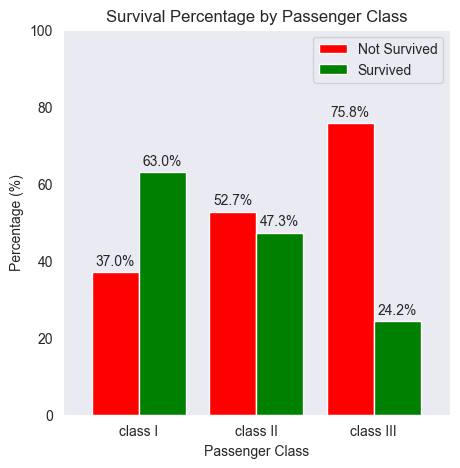

In [16]:

# Create Crosstab (Survival per Passenger Class)
table = pd.crosstab(df_train["Pclass"], df_train["Survived"])
table_percentage = table.div(table.sum(axis=1), axis=0) * 100  # Convert to percentage

# Plot Side-by-Side Bar Chart
colors = ["red", "green"]
ax = table_percentage.plot(kind="bar", stacked=False, color=colors, figsize=(5, 5), width=0.8)

# Add Percentage Labels
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='edge', fontsize=10, padding=3)

ax.set_xticklabels(["class I", "class II", "class III"], rotation=0)  # Roman numerals for 1, 2, 3

plt.title("Survival Percentage by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Percentage (%)")
plt.legend(["Not Survived", "Survived"])
plt.ylim(0, 100)  # Set limit to 100%
plt.show()


% of survivals in
Class I :  0.6296296296296297
Class II :  0.47282608695652173
Class III :  0.24236252545824846


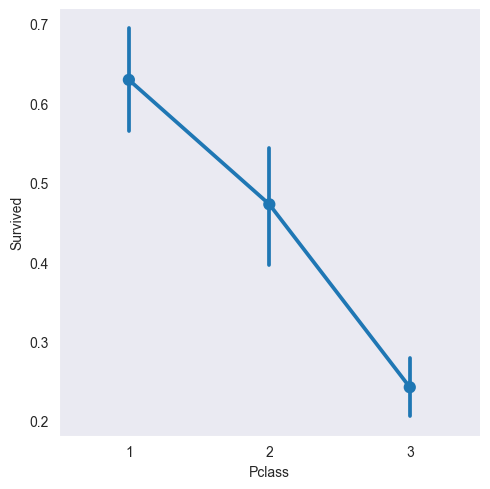

In [17]:
print("% of survivals in") 
print("Class I : ", df_train.Survived[df_train.Pclass == 1].sum()/df_train[df_train.Pclass == 1].Survived.count())
print("Class II : ", df_train.Survived[df_train.Pclass == 2].sum()/df_train[df_train.Pclass == 2].Survived.count())
print("Class III : ", df_train.Survived[df_train.Pclass == 3].sum()/df_train[df_train.Pclass == 3].Survived.count())


sns.catplot(x="Pclass", y="Survived", kind="point", data=df_train)

In [18]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

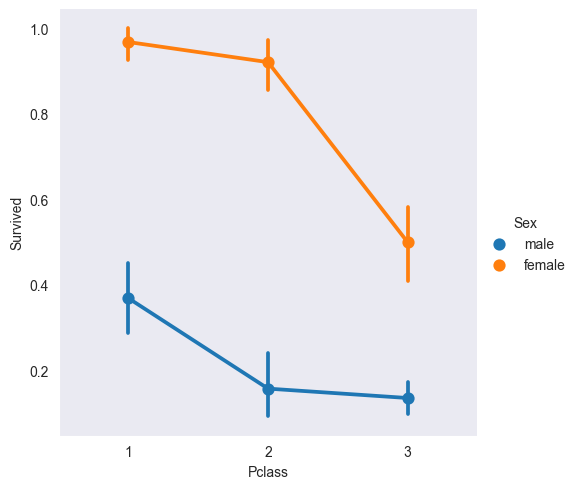

In [19]:
sns.catplot(x='Pclass',y='Survived',hue='Sex', kind='point', data=df_train)

### How does Embarcking port affect chances of survival 

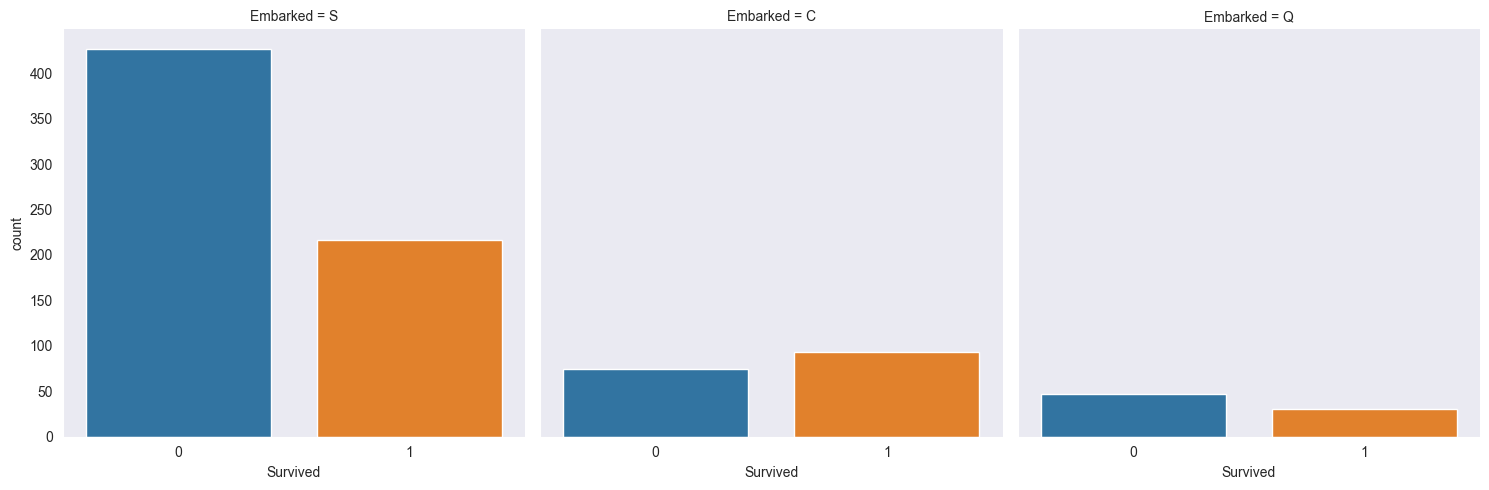

In [20]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train)

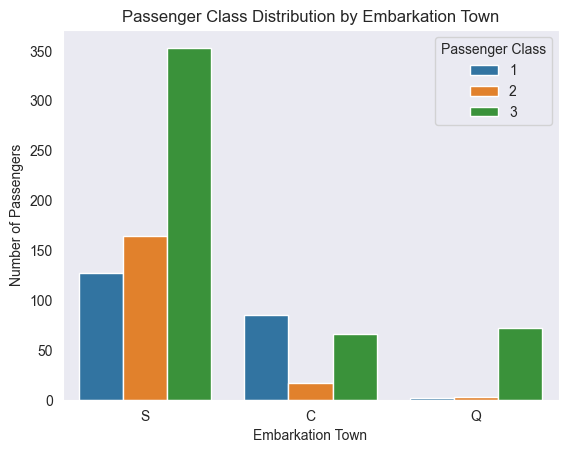

In [21]:
sns.countplot(data=df_train, x="Embarked", hue="Pclass")
plt.title("Passenger Class Distribution by Embarkation Town")
plt.xlabel("Embarkation Town")
plt.ylabel("Number of Passengers")
plt.legend(title="Passenger Class")
plt.show()

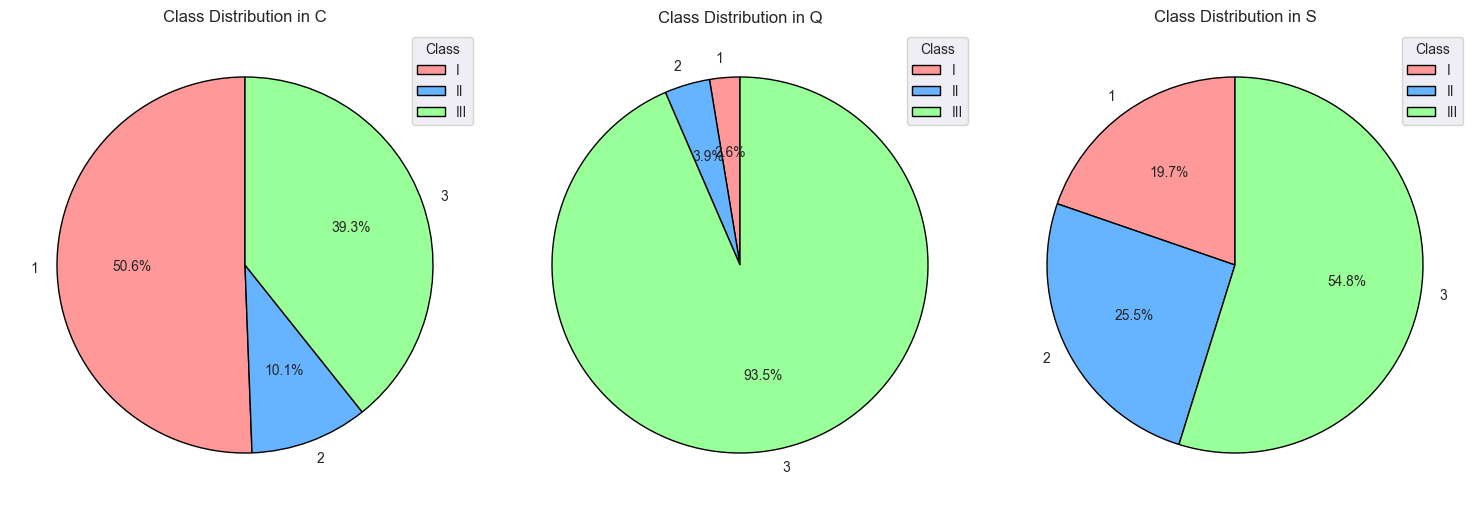

In [22]:
# Group data by embark_town and class
embark_class_counts = df_train.groupby("Embarked")["Pclass"].value_counts().unstack()

# Define colors for classes
colors = ["#ff9999", "#66b3ff", "#99ff99"]  # Colors for First, Second, Third class

class_mapping = {1: "class I", 2: "class II", 3: "class III"}
df_train["class_roman"] = df_train["Pclass"].map(class_mapping)  # Convert class column

# Create subplots for three embarkation towns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each embarkation port separately with Roman labels
for ax, town in zip(axes, embark_class_counts.index):
    embark_class_counts.loc[town].plot.pie(ax=ax, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})
    ax.set_title(f"Class Distribution in {town}")
    ax.set_ylabel("")  # Hide y-label
    ax.legend(title="Class", labels=["I", "II", "III"])  # Set legend to Roman numerals

# Adjust layout
plt.tight_layout()
plt.show()


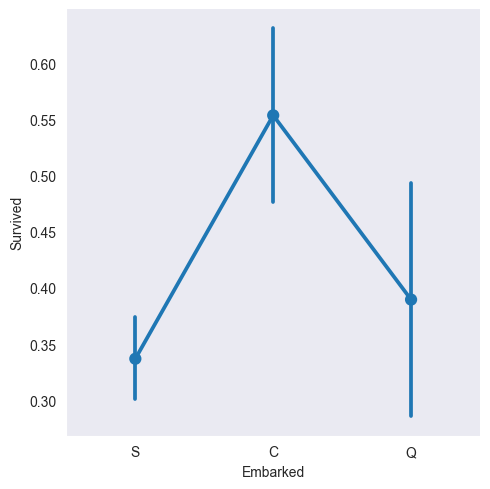

In [23]:
sns.catplot(x='Embarked',y='Survived', kind='point', data=df_train)

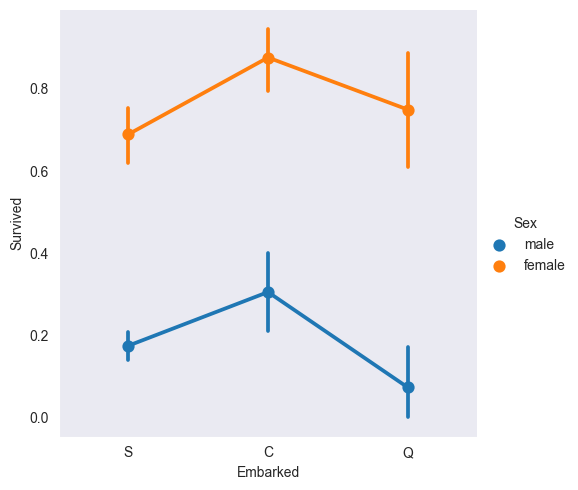

In [24]:
sns.catplot(x='Embarked',y='Survived', hue= 'Sex', kind='point', data=df_train)

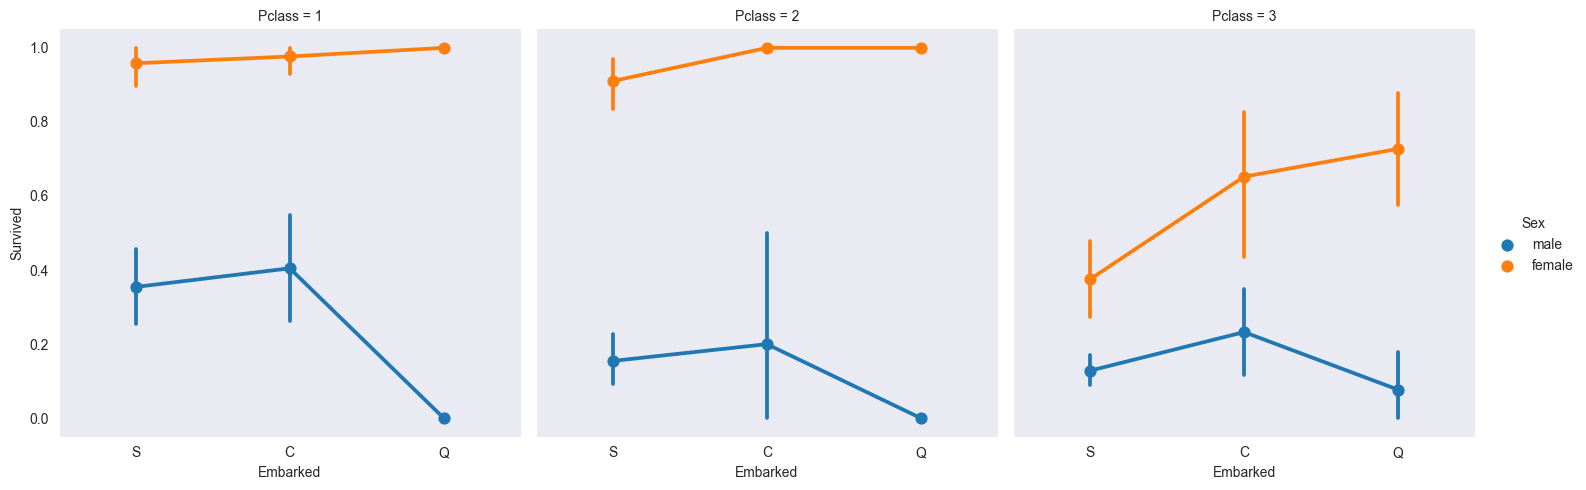

In [25]:
sns.catplot(x='Embarked',y='Survived', col='Pclass', hue= 'Sex', kind='point', data=df_train)


In [26]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=False)

Sex      female                              male                           \
Pclass        1         2          3            1         2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S  C  Q   S   C   Q   
Survived                                                                     
0             1  0   2  0  0   6   8   9  55   25  1  51  8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28  2  0  15  10   3   

Sex            
Pclass         
Embarked    S  
Survived       
0         231  
1          34

In [27]:
# model 3
df_test['Survived'] = 0
# all women survived
df_test.loc[ (df_test.Sex == 'female'), 'Survived'] = 1
# except for those in Pclass 3 and embarked in S
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Embarked == 'S') , 'Survived'] = 0
#df_test[['PassengerId', 'Survived']].to_csv('embarked_pclass_sex.csv', index=False)

In [28]:
#creating age bins
#eg. anyone with age between 51 to 60 will be placed in bin 6.0
for df in [df_train, df_test]:
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i

print(df_train[['Age' , 'Age_bin']].head(10))        

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


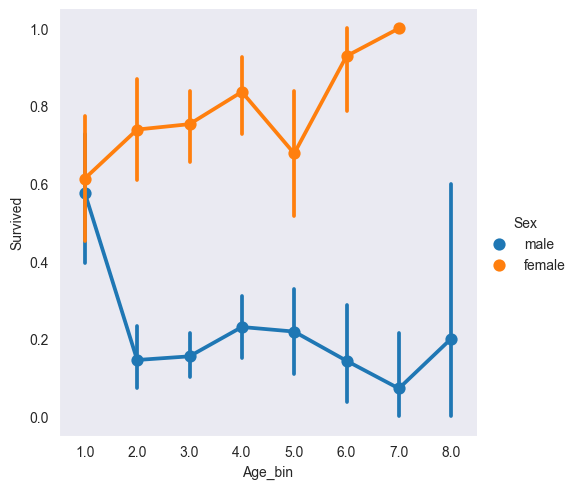

In [29]:
#Survival rate as per age groups for male and female
sns.catplot(x='Age_bin',y='Survived',hue='Sex',kind='point',data=df_train)

### How does age, sex and Passenger class correlate with survival ratio

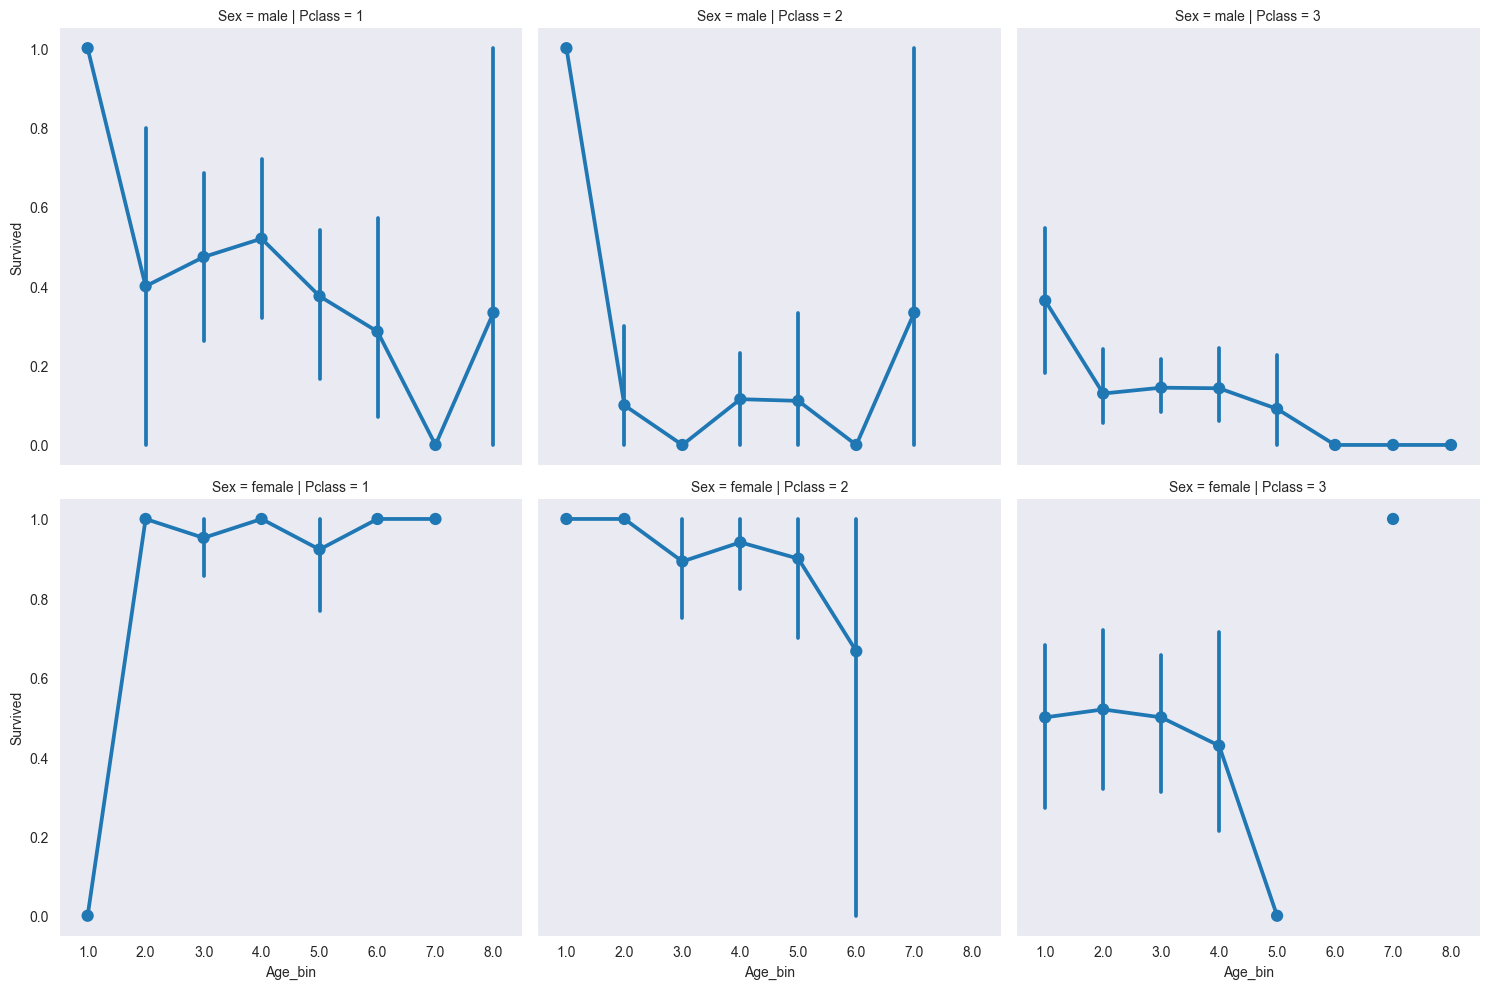

In [30]:
sns.catplot(x='Age_bin',y='Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train)

In [31]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [32]:
# in Pclass 1 and 2 all men in Age_bin = 1 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_bin == 1), 'Survived'] = 1
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 2) & (df_test.Age_bin == 1), 'Survived'] = 1

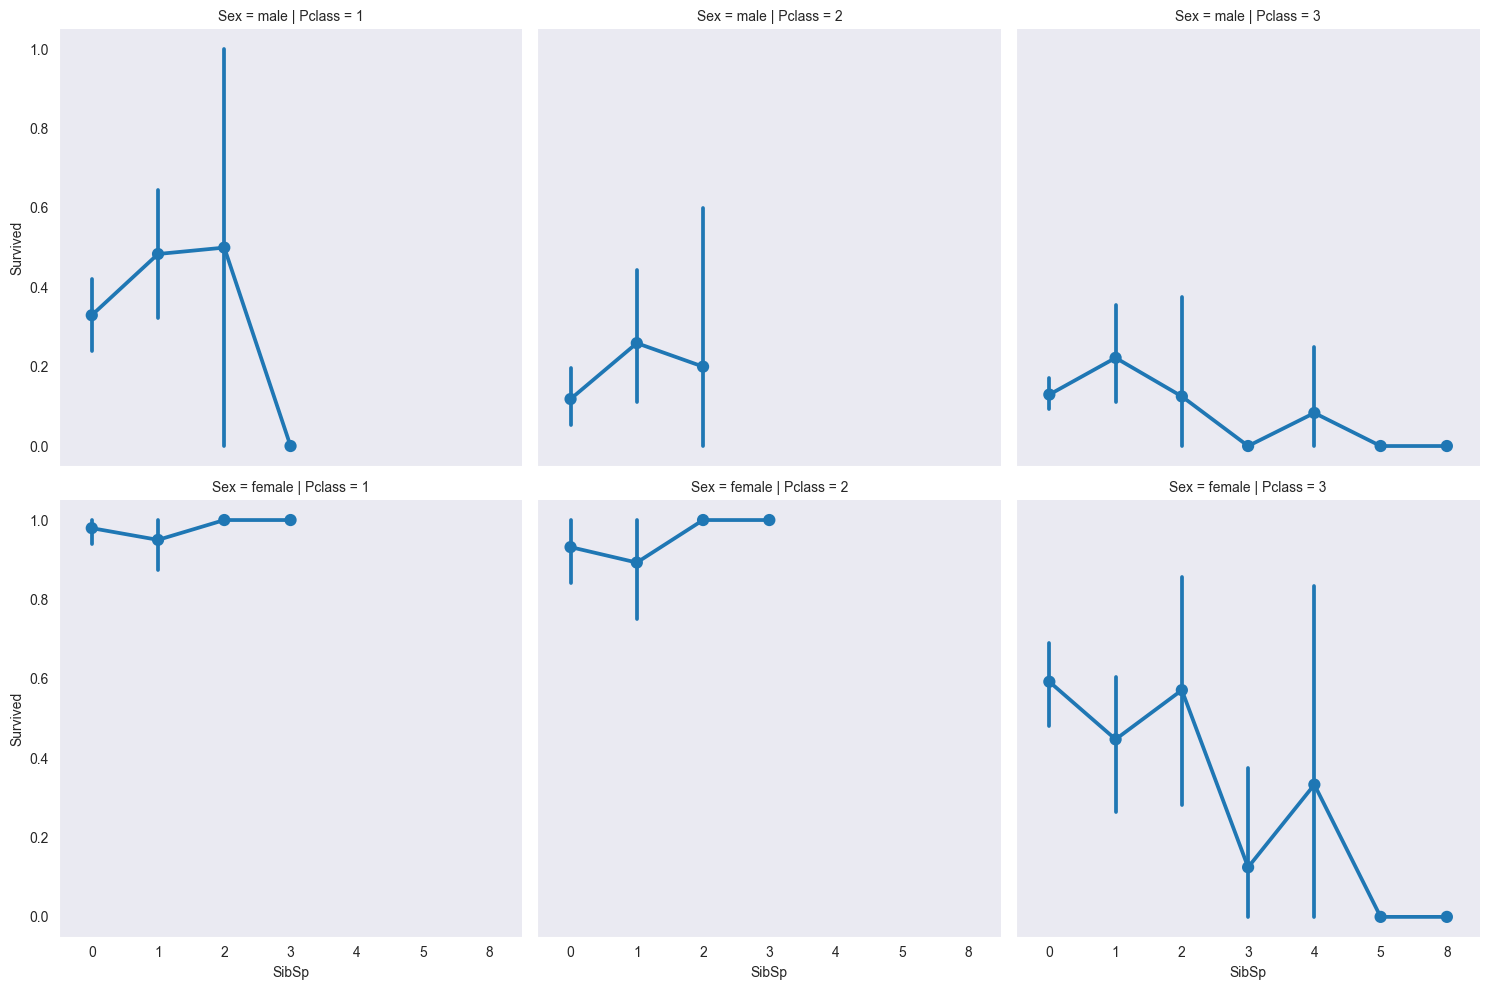

In [33]:
sns.catplot(x='SibSp',y='Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train)

## Influence of Number of Sibling or Spouse on rate of survival

In [34]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.SibSp, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [35]:
# all females with SibSp > 7 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.SibSp > 7) , 'Survived'] = 0

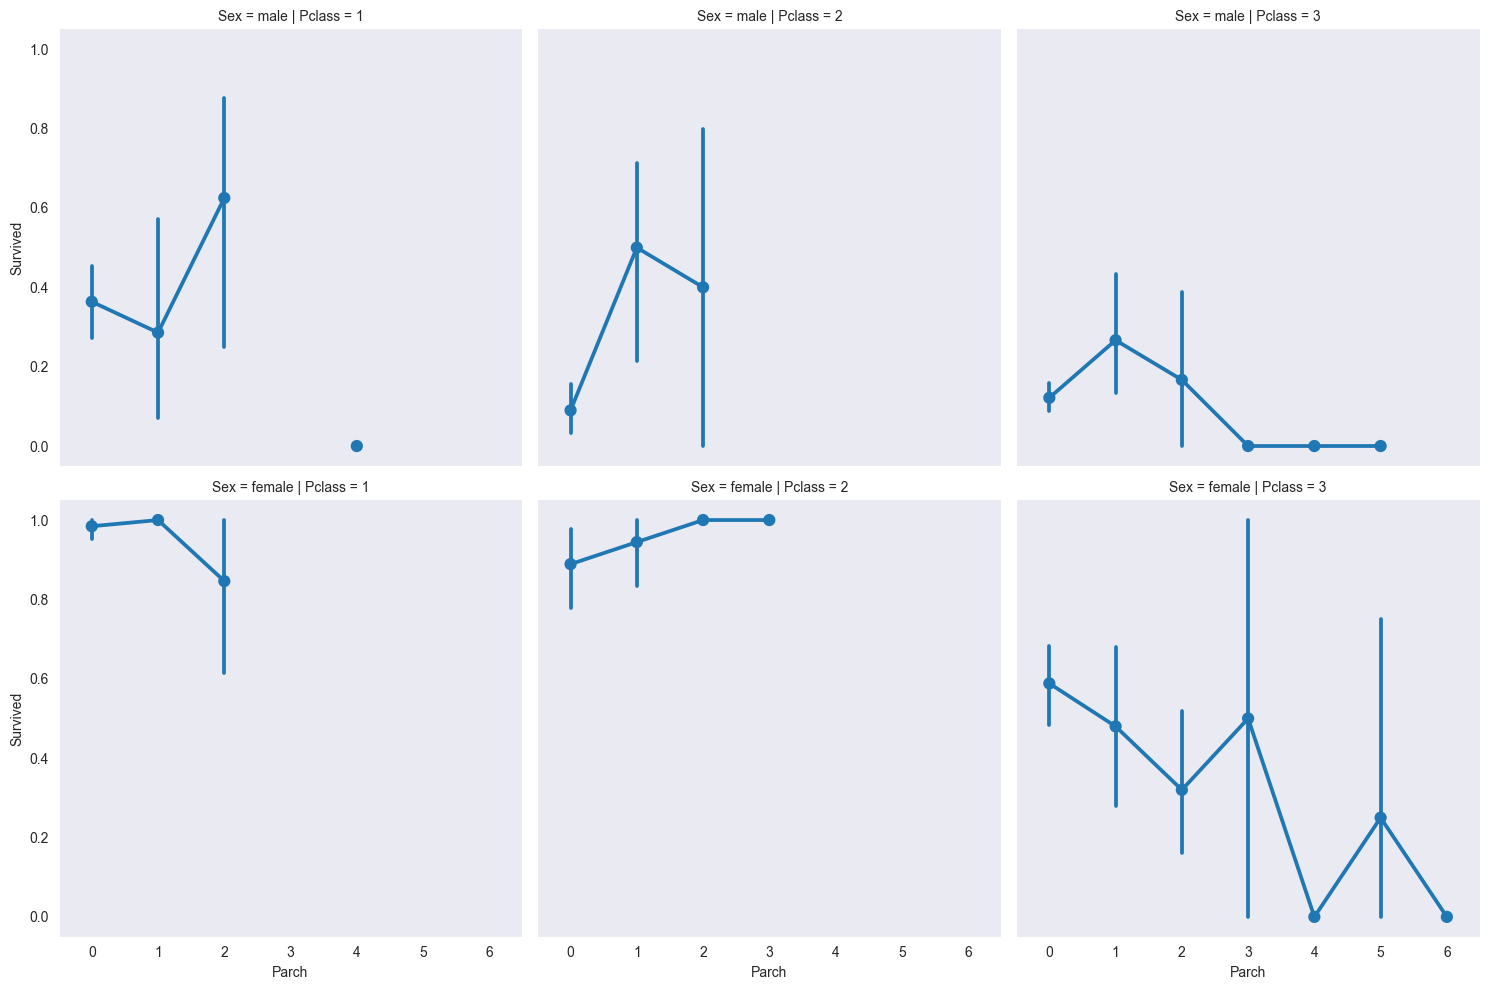

In [36]:
sns.catplot(x='Parch',y='Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train)

In [37]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [38]:
# survival rate is below 0.5 for females with Parch = 2 and Pclass = 3 
#df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 2), 'Survived'] = 0

# All females with Parch = 4 and Pclass = 3 died
##df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 4), 'Survived'] = 0

# all females with Parch > 4 died
#df_test.loc[ (df_test.Sex == 'female') & (df_test.Parch > 4) , 'Survived'] = 0

# For males with Parch = 2 and Pclass = 1 survival rate is above 0.5
##df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Parch == 1) , 'Survived'] = 1

#df_test.head(20)

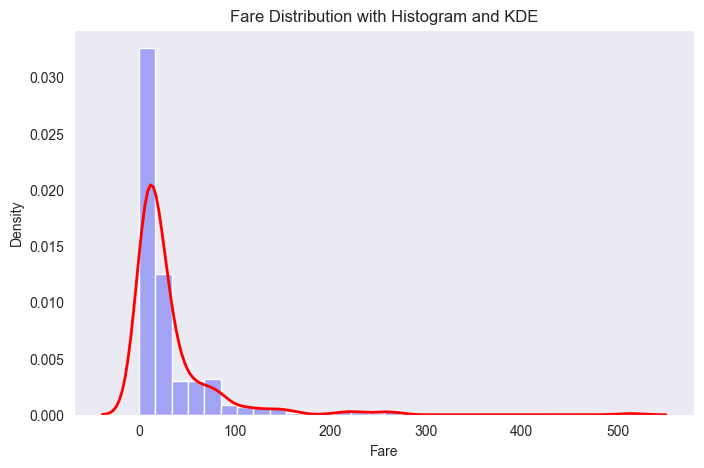

In [39]:
# Create the plot
plt.figure(figsize=(8,5))
sns.histplot(df_train["Fare"], bins=30, color="blue", alpha=0.3, stat='density')  # Histogram
sns.kdeplot(df_train["Fare"], color="red", linewidth=2)  # KDE curve

# Labels & Title
plt.title("Fare Distribution with Histogram and KDE")
plt.xlabel("Fare")
plt.ylabel("Density")

plt.show()

### Creating Fare bins with a scale 50
#### eg : 51-100, 101-150

In [40]:
for df in [df_train, df_test]:
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

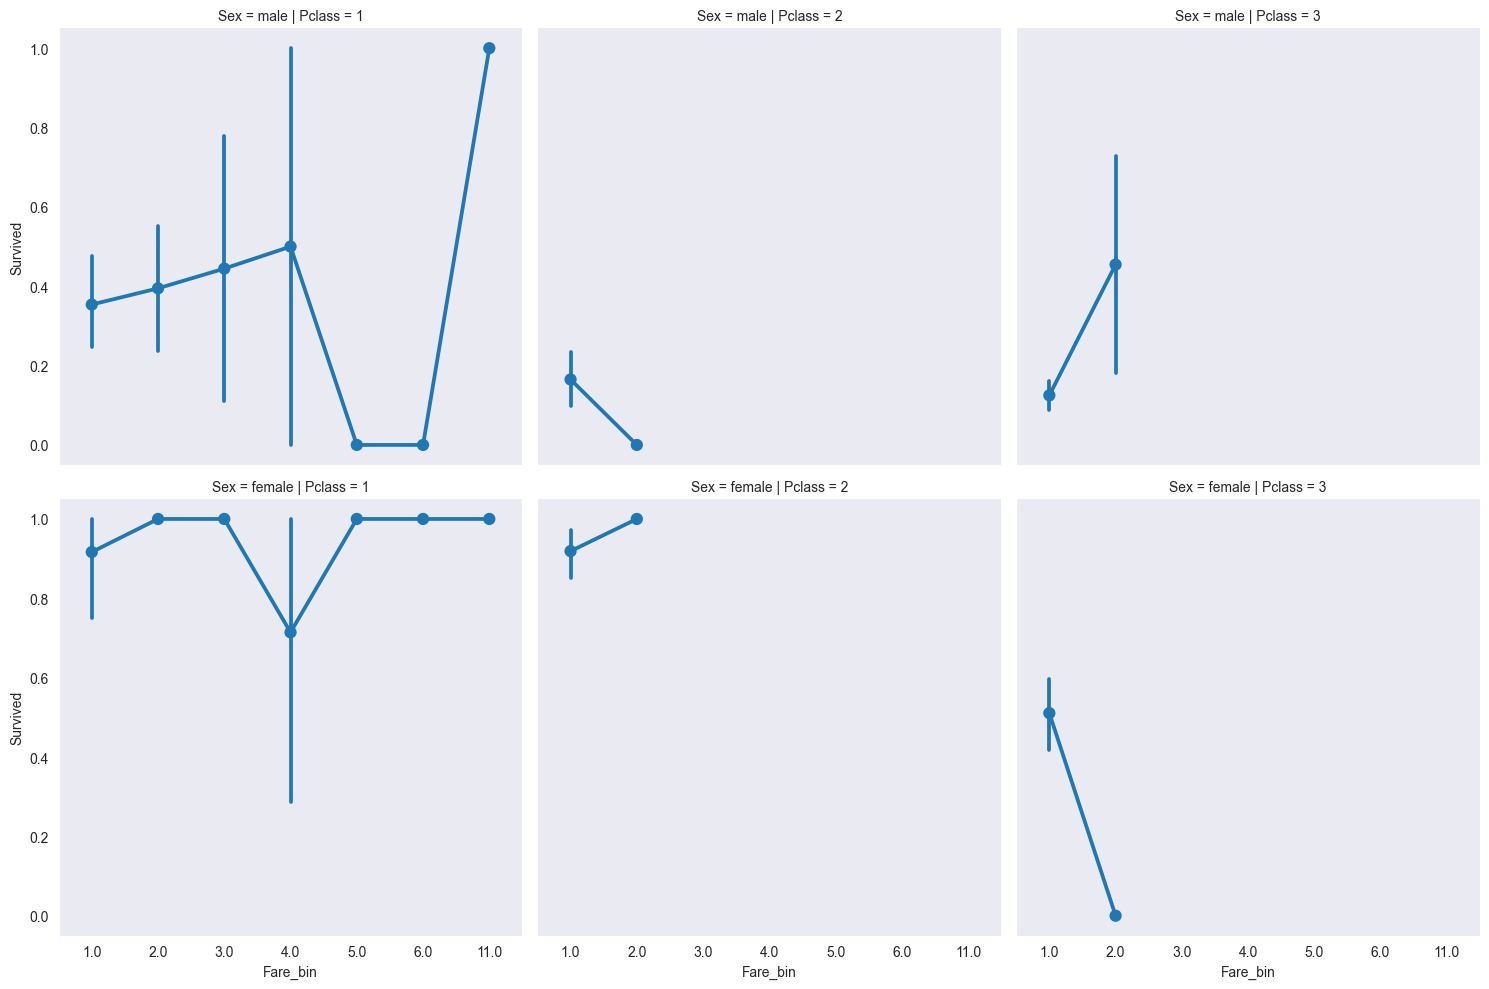

In [41]:
sns.catplot(x='Fare_bin',y='Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train)

In [42]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Fare_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [43]:
# males in Fare_bin = 11 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Fare_bin == 11), 'Survived'] = 1

In [44]:
# model 4
# df_test[['PassengerId', 'Survived']].to_csv('model_4.csv', index=False)

In [45]:
#df_test.drop(['Survived'],axis=1,inplace=True)

## Part 2: Data wrangling
##### building two new dataframes df_train_ml and df_test_ml these will have only ordinal features and no missing values so they can be used for ML algorithms converting categorical to numerical by pd.get_dummies dropping all features that seem to be not useful for prediction Then use the Standard scaler and apply train/test split

In [46]:
df_train_ml = df_train.copy()
df_test_ml = df_test.copy()

In [47]:
#removing the non pattering variable from the dataset
#get_dummies takes the categorial data, creates new columns for the categories and give a numrical value to the column based on the object category

df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin', 'class_roman'],axis=1,inplace=True)
df_train_ml.dropna(inplace=True)
df_train_ml

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


In [48]:
passenger_id = df_test_ml['PassengerId']
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
df_test_ml.head(10)

,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,0,1,0,1
2,62.0,0,0,9.6875,0,1,1,0,1,0
3,27.0,0,0,8.6625,0,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,0,1,0,1
5,14.0,0,0,9.2250,0,1,0,1,0,1
6,30.0,0,0,7.6292,1,0,1,0,0,1
7,26.0,1,1,29.0000,0,1,0,1,1,0
8,18.0,0,0,7.2292,1,0,0,0,0,1
9,21.0,2,0,24.1500,0,1,0,1,0,1


In [49]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    714 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       714 non-null    int64  
 3   Parch       714 non-null    int64  
 4   Fare        714 non-null    float64
 5   Sex_male    714 non-null    uint8  
 6   Embarked_Q  714 non-null    uint8  
 7   Embarked_S  714 non-null    uint8  
 8   Pclass_2    714 non-null    uint8  
 9   Pclass_3    714 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 37.0 KB


In [50]:
df_test_ml.head()

,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,0,1,0,1
2,62.0,0,0,9.6875,0,1,1,0,1,0
3,27.0,0,0,8.6625,0,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,0,1,0,1


In [51]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         332 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        417 non-null    float64
 4   Survived    418 non-null    int64  
 5   Sex_male    418 non-null    uint8  
 6   Embarked_Q  418 non-null    uint8  
 7   Embarked_S  418 non-null    uint8  
 8   Pclass_2    418 non-null    uint8  
 9   Pclass_3    418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB


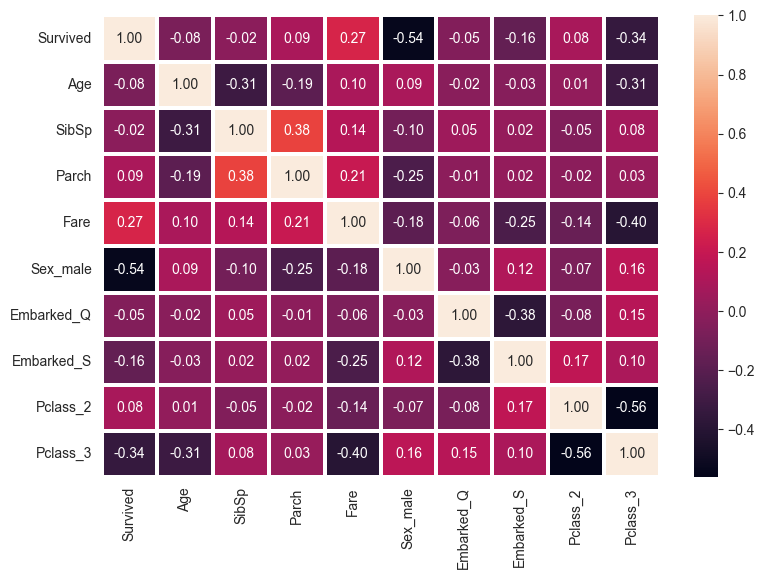

In [52]:
corr = df_train_ml.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
# for df_train_ml
scaler.fit(df_train_ml.drop('Survived',axis=1))
scaled_features = scaler.transform(df_train_ml.drop('Survived',axis=1))
df_train_ml_sc = pd.DataFrame(scaled_features, columns=df_train_ml.columns[:-1])

# for df_test_ml
df_test_ml.fillna(df_test_ml.mean(), inplace=True)
scaler.fit(df_test_ml)
scaled_features = scaler.transform(df_test_ml)
df_test_ml_sc = pd.DataFrame(scaled_features, columns=df_test_ml.columns)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train_ml.drop('Survived',axis=1), df_train_ml['Survived'], test_size=0.30, random_state=101)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(df_train_ml_sc, df_train_ml['Survived'], test_size=0.30, random_state=101)

In [56]:
# unscaled
X_train_all = df_train_ml.drop('Survived',axis=1)
y_train_all = df_train_ml['Survived']
X_test_all = df_test_ml

# scaled
X_train_all_sc = df_train_ml_sc
y_train_all_sc = df_train_ml['Survived']
X_test_all_sc = df_test_ml_sc

In [57]:
X_test_all.fillna(X_test_all.mean(), inplace=True)

## Part 3: Scikit-learn basic ML algorithms and comparison of model results <br>
### Test simple sklearn models and compare by metrics

### We test the following classifiers from scikit-learn:
#### 3.1 Logistic Regression
#### 3.2 Gaussian Naive Bayes
#### 3.3 K nearest neighbors KNN
#### 3.4 Decision tree classifier
#### 3.5 Random forest classifier
#### 3.6 SVM classifier

#### First we apply the data from test/train split to get a first overview of the model performance.Later we use the k fold cross validation which gives a better estimate for out of sample data.

#### For comparison of the results we use these metrics:
### accuracy_score, classification_report, confusion_matrix

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))
print(accuracy_score(y_test, pred_logreg))

[[105  18]
 [ 28  64]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       123
           1       0.78      0.70      0.74        92

    accuracy                           0.79       215
   macro avg       0.78      0.77      0.78       215
weighted avg       0.79      0.79      0.78       215

0.786046511627907


c:\Users\shaik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
